# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [13]:
import scipy.io as sio

# Cargamos un archivo de Matlab
data = sio.loadmat('./data/ejer_1_data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

#### 3. Create a DataFrame with the features and target

In [14]:
# Extraemos los features y el target
X = data['X']
y = data['y']

# Creamos los feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])] #Vamos sacando por cada columna de X columnas feature
#es decir, feature_0, feature_1...

# Creamos ahora el DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y.ravel() #y.ravel() es un método que devuelve una matriz unidimensional contigua y aplanada
#que contiene todos los elementos del array original.

print(df.head())
print(df.info())

   feature_0  feature_1  target
0     1.9643     4.5957       1
1     2.2753     3.8589       1
2     2.9781     4.5651       1
3     2.9320     3.5519       1
4     3.5772     2.8560       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  51 non-null     float64
 1   feature_1  51 non-null     float64
 2   target     51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 995.0 bytes
None


#### 4. Plot a scatterplot with the data

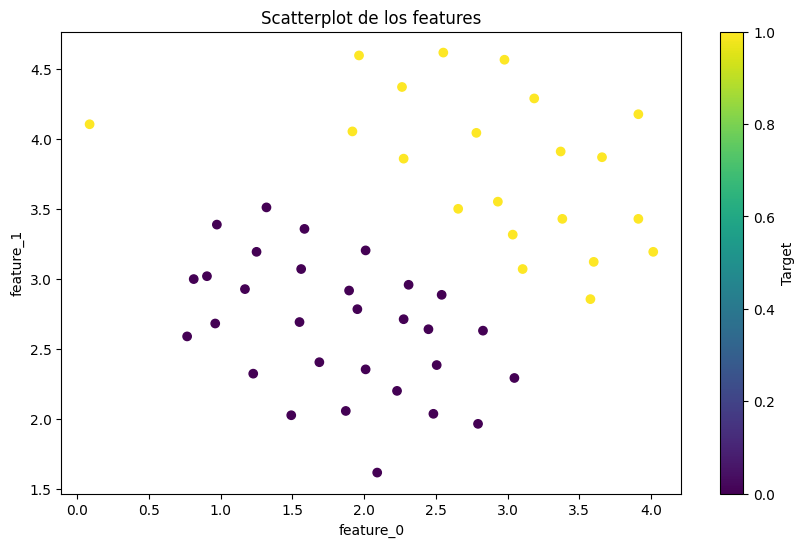

In [15]:
# Seleccionamos las dos features para el scatterplot
feature_1 = 'feature_0'
feature_2 = 'feature_1'

# Creamos el scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df[feature_1], df[feature_2], c=df['target'], cmap='viridis')

plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Scatterplot de los features')

plt.colorbar(scatter, label='Target')
plt.show()

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Separamos en features y en target
X = df.drop('target', axis=1)
y = df['target']

# separamos en test y en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creamos y entrenamos el SVM classifier
svm_classifier = SVC(kernel='linear',C=1, random_state=42) #con C=1 y con Kernel linear
svm_classifier.fit(X_train_scaled, y_train)

#Hacemos la predicción
y_pred = svm_classifier.predict(X_test_scaled)

# Calculamos el accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"El accuracy score con C=1 es: {accuracy:.2f}")

El accuracy score con C=1 es: 1.00


C=1 es muy permisivo por tanto, el outlier ha caido dentro del dataset del train

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



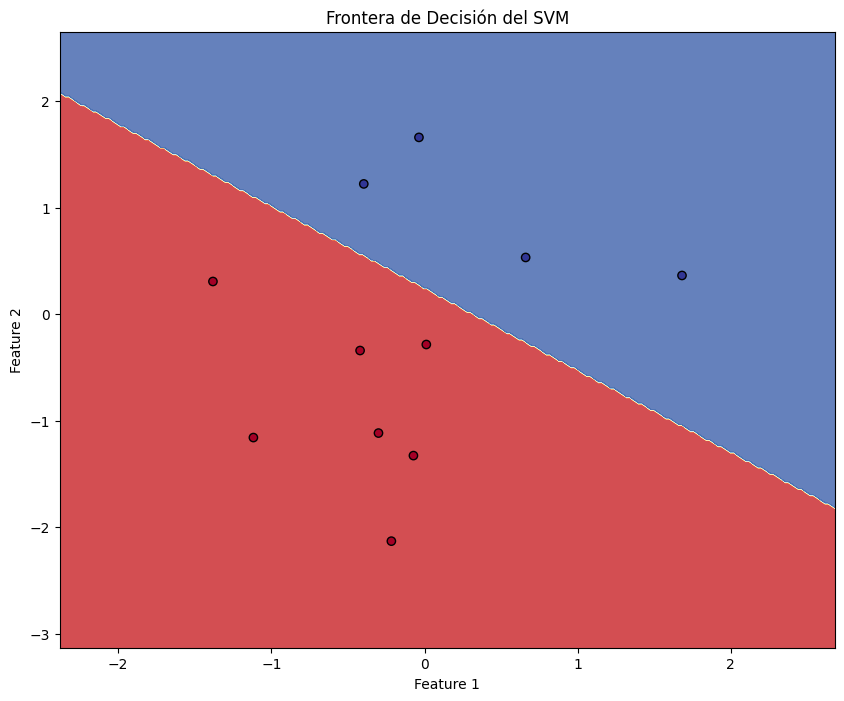

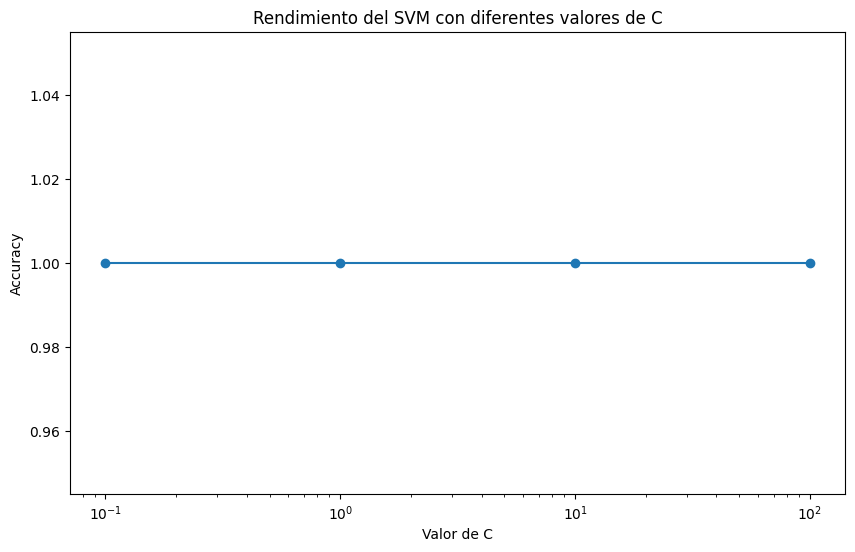

In [17]:
from sklearn.metrics import classification_report

# Obtenemos las predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_scaled)

# Calculamos y mostramos el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizamos la frontera de decisión a continuación utilizando las dos primeras características
def plot_decision_boundary(X, y, model, ax=None):
    h = .02 #define la granularidad de la cuadrícula
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #Se calculan los límites mínimos y máximos y añadimos un margen de 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #Se crea una cuadrícula de puntos usando np.meshgrid para cubrir todo el espacio de características.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    #Se aplana la cuadrícula y se usa el modelo para predecir la clase de cada punto.
    Z = Z.reshape(xx.shape)
    #Se reforman las predicciones para que coincidan con la forma de la cuadrícula original.
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    return ax

plt.figure(figsize=(10, 8))
plot_decision_boundary(X_test_scaled[:, :2], y_test, svm_classifier)
plt.title('Frontera de Decisión del SVM')
plt.show()

# Evaluamos el rendimiento con diferentes valores de C
C_values = [0.1, 1, 10, 100]
accuracies = [] #Creamos una lista vacía de accuracies

for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Valor de C')
plt.ylabel('Accuracy')
plt.title('Rendimiento del SVM con diferentes valores de C')
plt.show()

#### 9. Do the same with the second model

In [18]:
# Cargamos un archivo de Matlab
data1 = sio.loadmat('./data/ejer_1_data2.mat')
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [19]:
# Extraemos los features y el target
X = data1['X']
y = data1['y']

# Creamos los feature names
feature_names1 = [f'feature_{i}' for i in range(X.shape[1])]

# Creamos el DataFrame
df1 = pd.DataFrame(X, columns=feature_names1)
df1['target'] = y.ravel()

print(df1.head())
print(df1.info())

   feature_0  feature_1  target
0   0.107143   0.603070       1
1   0.093318   0.649854       1
2   0.097926   0.705409       1
3   0.155530   0.784357       1
4   0.210829   0.866228       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  863 non-null    float64
 1   feature_1  863 non-null    float64
 2   target     863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB
None


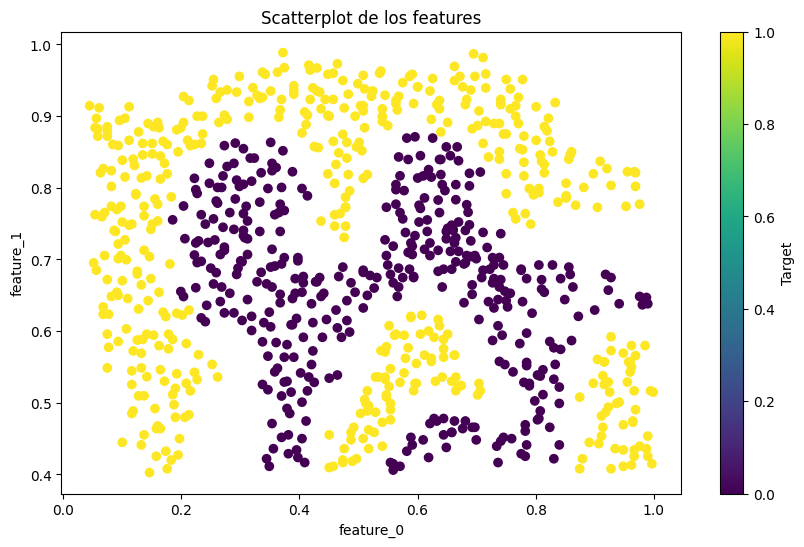

In [20]:
feature_1 = 'feature_0'
feature_2 = 'feature_1'

# Creamos el scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df1[feature_1], df1[feature_2], c=df1['target'], cmap='viridis')

plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Scatterplot de los features')

plt.colorbar(scatter, label='Target')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Separamos en features y en target
X = df1.drop('target', axis=1)
y = df1['target']

# separamos en test y en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creamos y entrenamos el SVM classifier
svm_classifier = SVC(kernel='poly',degree=1,C=1, random_state=42) #con C=1
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculamos el accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"El accuracy score con C=1: {accuracy:.2f}")

El accuracy score con C=1: 0.52


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.52      0.36      0.43        85
           1       0.52      0.67      0.59        88

    accuracy                           0.52       173
   macro avg       0.52      0.52      0.51       173
weighted avg       0.52      0.52      0.51       173



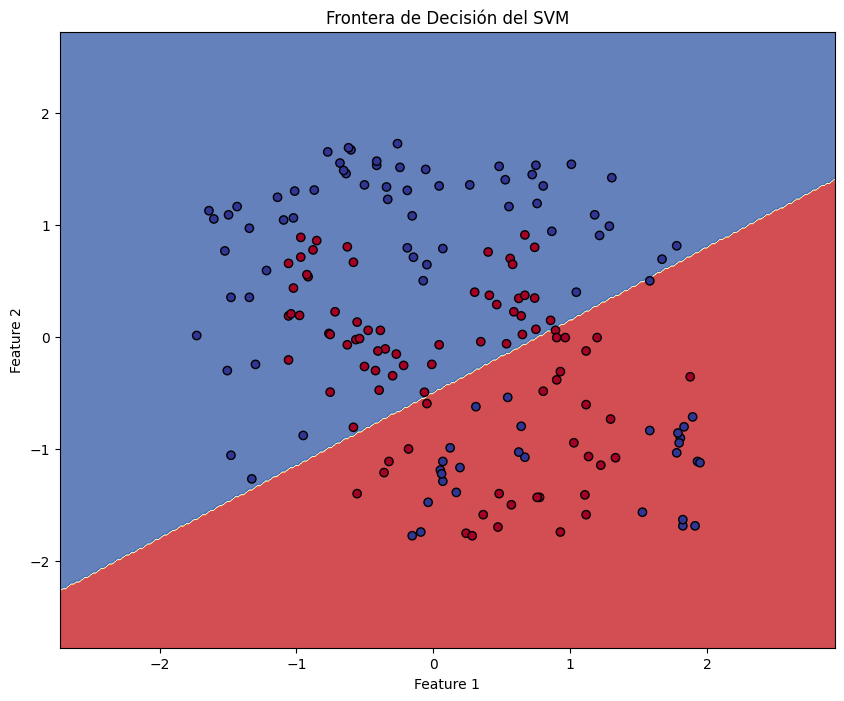

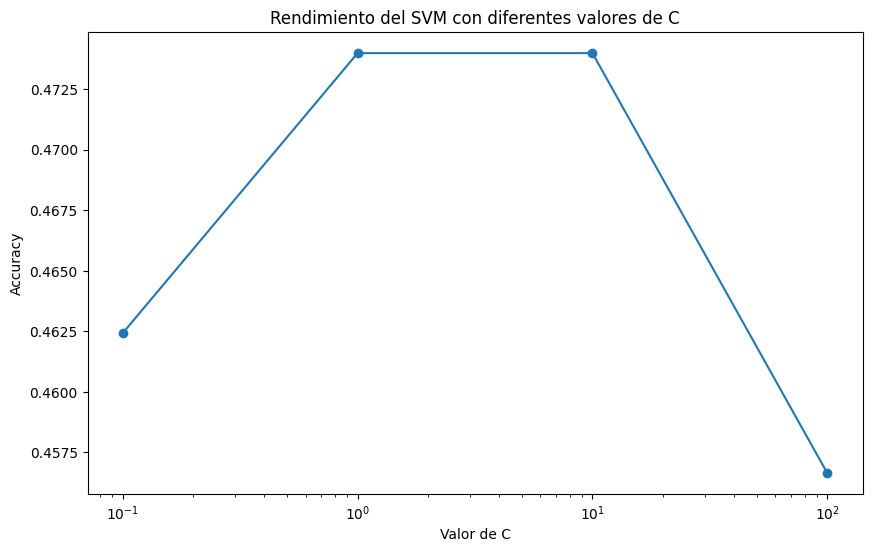

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Obtenemos las predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_scaled)

# Calculamos y mostramos el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


# Visualizamos la frontera de decisión
def plot_decision_boundary(X, y, model, ax=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    return ax

plt.figure(figsize=(10, 8))
plot_decision_boundary(X_test_scaled[:, :2], y_test, svm_classifier)
plt.title('Frontera de Decisión del SVM')
plt.show()

# Evaluamos lo que es el rendimiento con diferentes valores de C
C_values = [0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm = SVC(kernel='poly', C=C, random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Valor de C')
plt.ylabel('Accuracy')
plt.title('Rendimiento del SVM con diferentes valores de C')
plt.show()